In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import datetime

%matplotlib inline
import seaborn as sns
import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
pd.options.display.max_colwidth=200
pd.options.display.max_rows=100
pd.options.display.max_columns=500
import warnings
warnings.filterwarnings('ignore')


1 . Read The Data


In [191]:
df=pd.read_csv(r'train.xlsx.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,Ga

2.see the info and data to understand the data 

In [192]:
df.shape

(1168, 81)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [194]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
Id,1168.0,724.136130,416.159877,1.0,360.50,714.5,1079.5,1460.0
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.0,190.0
LotFrontage,954.0,70.988470,24.828750,21.0,60.00,70.0,80.0,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.5,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.0,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.0,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.0,2010.0
MasVnrArea,1161.0,102.310078,182.595606,0.0,0.00,0.0,160.0,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.5,5644.0


In [195]:

#checking for null values
NA_col=df.isnull().sum()
NA_col

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [196]:
#find out the column which have null values
NA_col=NA_col[NA_col>0]
NA_col

LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

In [197]:
#% of column missing
print(round(100*NA_col[NA_col>0]/len(df),2))

LotFrontage     18.32
Alley           93.41
MasVnrType       0.60
MasVnrArea       0.60
BsmtQual         2.57
BsmtCond         2.57
BsmtExposure     2.65
BsmtFinType1     2.57
BsmtFinType2     2.65
FireplaceQu     47.17
GarageType       5.48
GarageYrBlt      5.48
GarageFinish     5.48
GarageQual       5.48
GarageCond       5.48
PoolQC          99.40
Fence           79.71
MiscFeature     96.23
dtype: float64


observation Based on the above data, we can drop the following columns - LotFrontage - Alley - FireplaceQu - PoolQC - Fence - MiscFeature - Id (dropping this not because of count, irrelevant) - MoSold (dropping this not because of count, irrelevant) - Street (dropping this not because of count, irrelevant) - Utilities (dropping this not because of count, irrelevant)

# 3. Data Treatment

In [198]:
#dropping column with high missing values and irrevelent column
df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id','MoSold','Street','Utilities'],axis=1,inplace=True)

In [226]:



df.shape

(1168, 193)

In [200]:

#checking all null values
NA_col=df.isnull().sum()
#column have null values
NA_col=NA_col[NA_col>0]
#% of colmun missing
print(round(100*NA_col[NA_col>0]/len(df),2))


MasVnrType      0.60
MasVnrArea      0.60
BsmtQual        2.57
BsmtCond        2.57
BsmtExposure    2.65
BsmtFinType1    2.57
BsmtFinType2    2.65
GarageType      5.48
GarageYrBlt     5.48
GarageFinish    5.48
GarageQual      5.48
GarageCond      5.48
dtype: float64


In [201]:
#converting years to age
df['YearBuilt_Age']=df['YearBuilt'].max()-df['YearBuilt']
df['YearRemodAdd_Age']=df['YearRemodAdd'].max()-df['YearRemodAdd']
df['YrSold_Age']=df['YrSold'].max()-df['YrSold']
df['GarageYrBlt_Age']=df['GarageYrBlt'].max()-df['GarageYrBlt']
# droping columns
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1,inplace=True)


In [202]:
df[['YearBuilt_Age','YearRemodAdd_Age','YrSold_Age','GarageYrBlt_Age']].head(10)

,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,34,34,3,33.0
1,40,40,3,40.0
2,14,13,3,13.0
3,33,33,0,33.0
4,33,10,1,33.0
5,4,4,4,4.0
6,53,14,0,53.0
7,53,10,4,53.0
8,45,45,3,45.0
9,63,60,2,63.0


# 4. filling misssing values

In [251]:
def treat_missing_values(x):
    
    #check for null values
    NA_col=df.isnull().sum()
    
    #checking for the column which have null value
    NA_col=NA_col[NA_col>0]
    
    for col in NA_col.index:
        if x[col].dtype.name== 'object':
            x[col].fillna(df[col].mode()[0],inplace=True)
        elif x[col].dtype.name=='float64' or x[col].dtype.name=='int32' or x[col].dtype.name=='int64':
            x[col].fillna((x[col].median()))
        else:
            print('unable to detect the dtype for col--',col)
        return x
            

In [252]:
df=treat_missing_values(df)

In [253]:
df

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,4928,0,0,6,5,0.0,0,0,0,0,0,0,120,0,0,958,1078,0,0,958,0,0,958,0,0,2,0,2,1,0,5,1,0,2,440,0,0,0,205,0,0,0,0,0,2.546299,34,34,3,33.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,15865,0,1,8,6,0.0,1,1,1,1,1,0,351,1,823,1043,2217,1,0,2217,0,0,2217,1,0,2,0,4,1,1,8,1,1,2,621,0,0,81,207,0,0,224,0,0,2.602597,40,40,3,40.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,9920,0,0,7,5,0.0,1,0,0,0,2,1,862,0,0,255,1117,1,0,1127,886,0,2013,1,0,2,1,

In [206]:
#checking all null values
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values>0.00]

MasVnrArea         0.01
BsmtQual           0.03
BsmtCond           0.03
BsmtExposure       0.03
BsmtFinType1       0.03
BsmtFinType2       0.03
GarageType         0.05
GarageFinish       0.05
GarageQual         0.05
GarageCond         0.05
GarageYrBlt_Age    0.05
dtype: float64

In [254]:
df.corr()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.124151,0.077077,-0.014930,0.070462,-0.056978,0.027868,0.031367,0.004413,-0.083475,0.011126,0.064003,-0.041187,-0.052236,-0.049942,-0.062403,-0.134170,-0.214042,-0.017862,0.113883,-0.227927,0.300366,0.053737,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,0.011261,0.051179,-0.035792,0.076505,-0.027639,-0.092408,0.107870,0.095353,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.044183,-0.023988,-0.056618,0.038595,-0.077630,0.169130,0.066187,-0.308607,0.237026,0.007760,-0.023630,-0.009970,-0.045649,-0.005342,-0.011626,0.078144,0.101984,0.240102,-0.033636,-0.010427,-0.109011,0.008536,-0.010472,0.005999,-0.029439,0.235677,-0.000621,-0.176628,0.164876,-0.077801,-0.015198,0.047471,0.086247,0.062688,-0.089838,0.003981,0.097663,0.090634,-0.055054,0.016136,-0.031481,0.038495,-0.040168,-0.032409,-0.030575,-0.013437,0.003193,-0.019951,0.002683,-0.054470,0.012731,-0.0165

In [225]:
df.shape

(1168, 193)

In [255]:
df.corr()['SalePrice'].sort_values()

YearBuilt_Age       -0.576723
YearRemodAdd_Age    -0.571524
GarageYrBlt_Age     -0.529527
GarageType_Detchd   -0.381623
MasVnrType_None     -0.371454
                       ...   
GarageArea           0.645829
GarageCars           0.671233
GrLivArea            0.693082
OverallQual          0.816351
SalePrice            1.000000
Name: SalePrice, Length: 193, dtype: float64

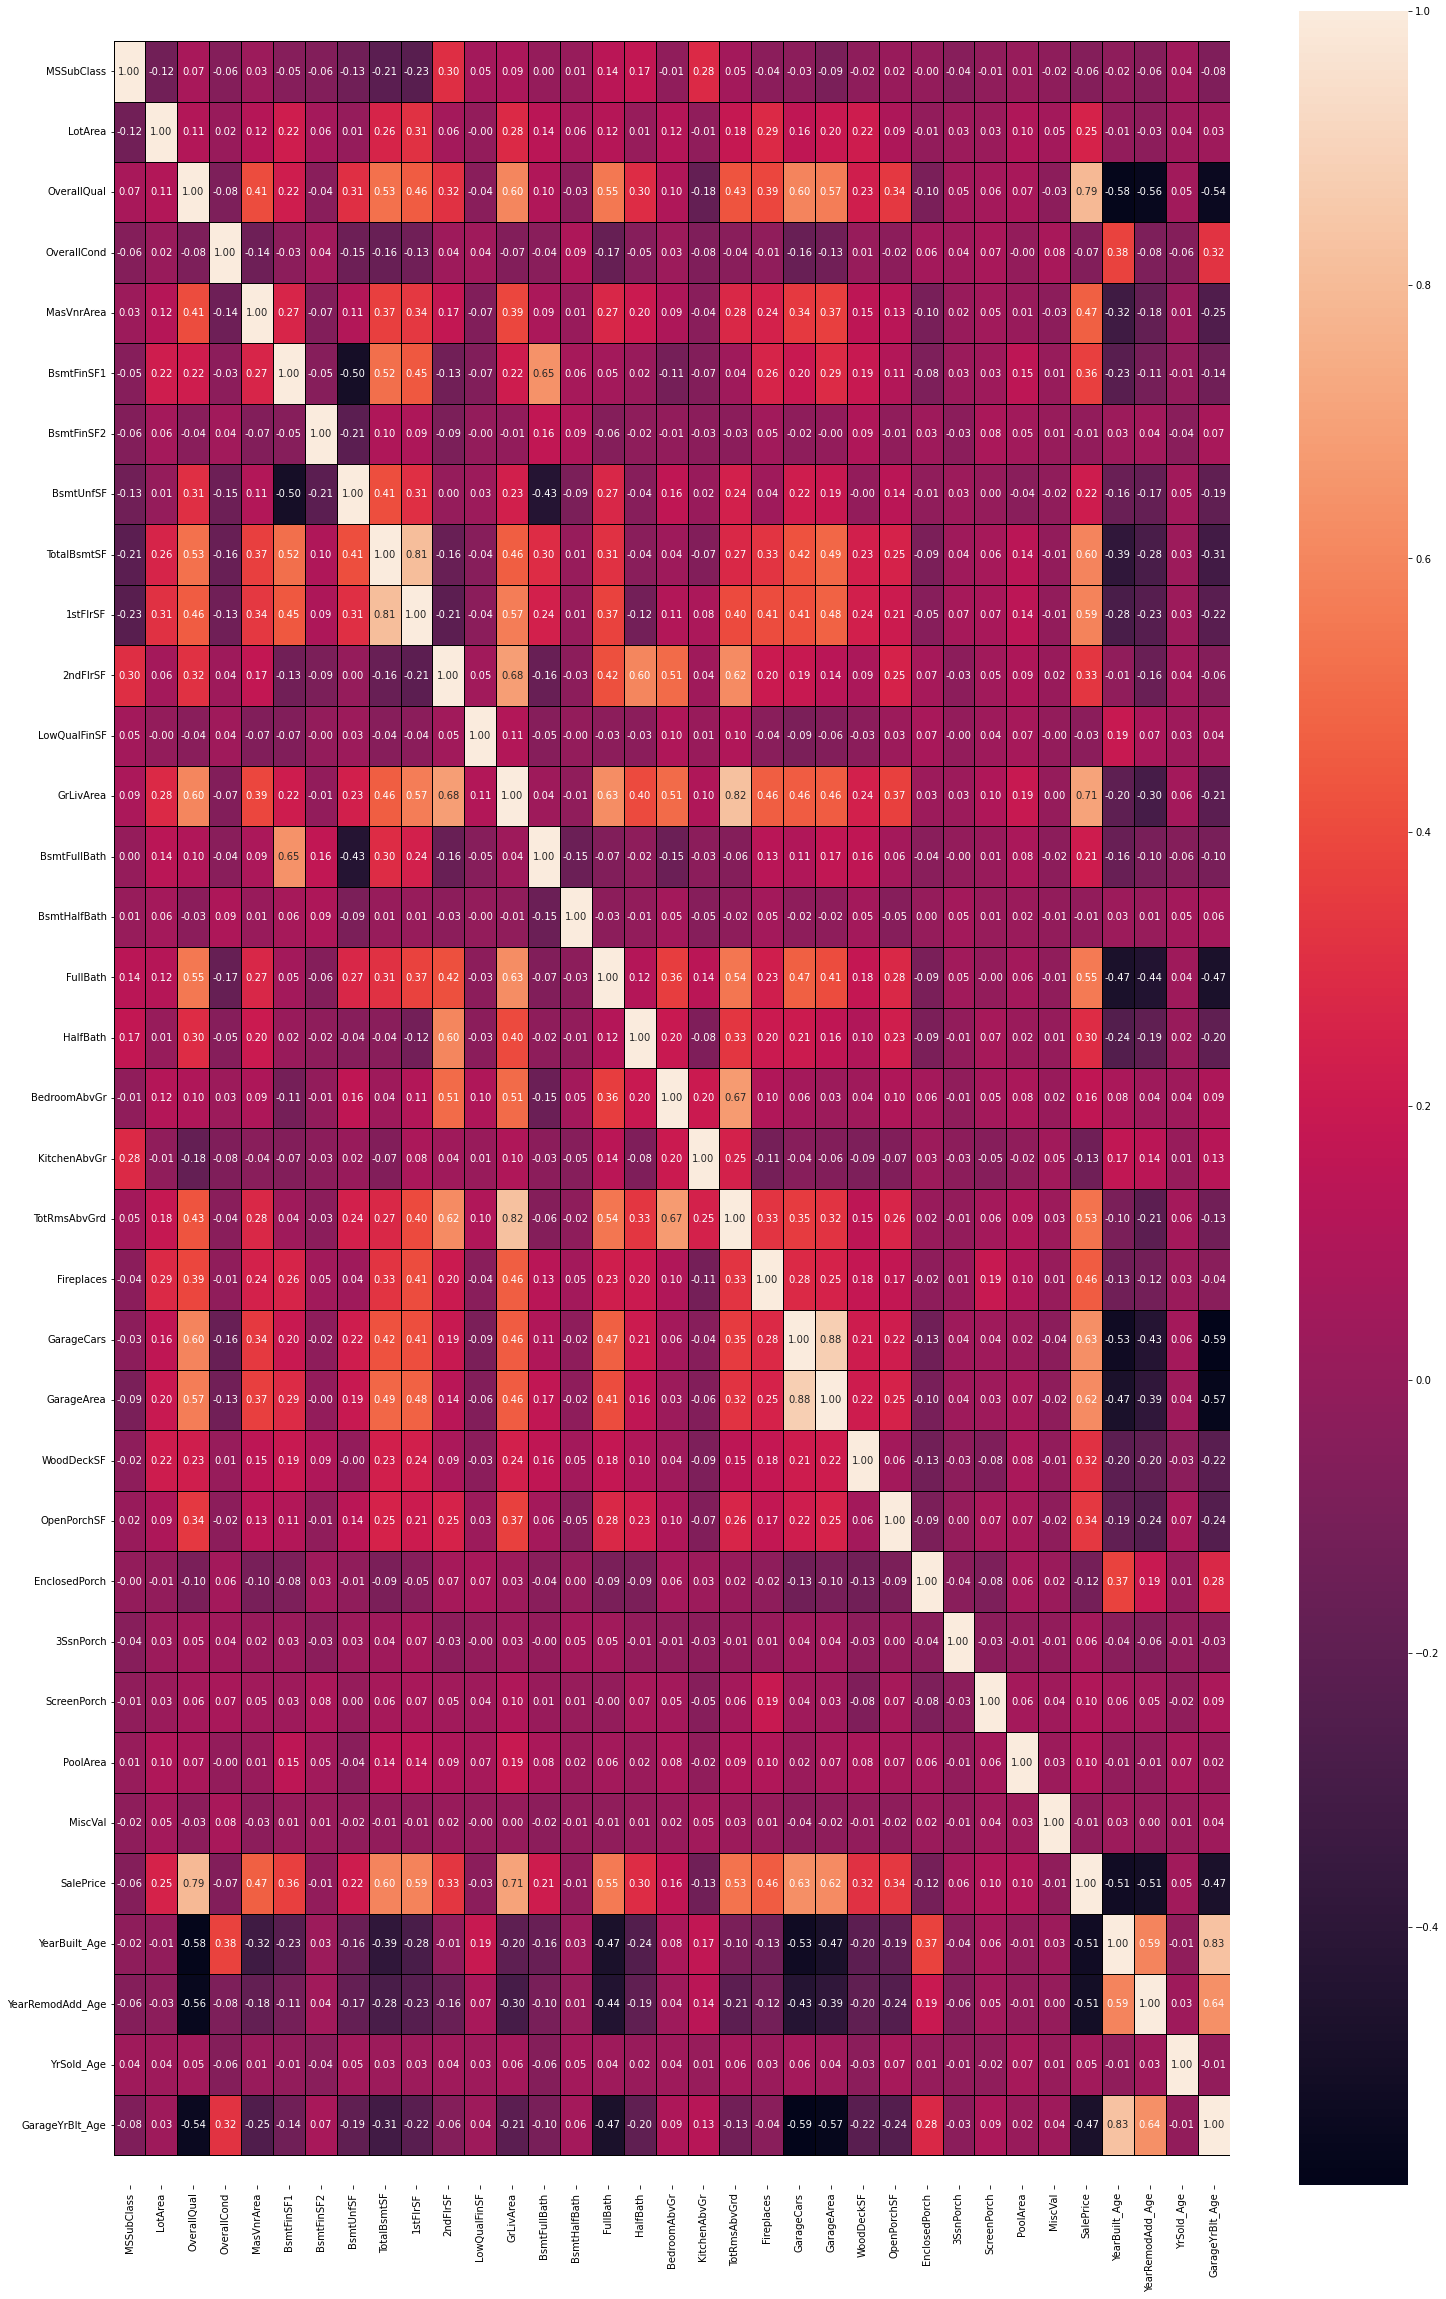

In [209]:
f,ax=plt.subplots(figsize=(25,40))
sns.heatmap(df.corr(),xticklabels=df.corr().columns.values,yticklabels=df.corr().columns.values,annot=True,linewidths=0.5,linecolor='black',fmt='0.2f')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom +0.5,top -0.5)
plt.show()


In [210]:
corr_val=df[list(df.dtypes[df.dtypes!='object'].index)].corr()
corr_val

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
MSSubClass,1.000000,-0.124151,0.070462,-0.056978,0.027868,-0.052236,-0.062403,-0.134170,-0.214042,-0.227927,0.300366,0.053737,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,0.051179,-0.035792,-0.027639,-0.092408,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.060775,-0.023988,-0.056618,0.038595,-0.077630
LotArea,-0.124151,1.000000,0.107188,0.017513,0.121448,0.221851,0.056656,0.006600,0.259733,0.312843,0.059803,-0.001915,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,0.184546,0.285983,0.158313,0.195162,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.249499,-0.005506,-0.027228,0.035399,0.034981
OverallQual,0.070462,0.107188,1.000000,-0.083167,0.409163,0.219643,-0.040893,0.308676,0.528285,0.458758,0.316624,-0.039295,0.599700,0.101732,-0.030702,0.548824,0.296134,0.099639,-0.178220,0.432579,0.390067,0.596322,0.566782,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.789185,-0.575800,-0.555945,0.048759,-0.541719
OverallCond,-0.056978,0.017513,-0.083167,1.000000,-0.137882,-0.028810,0.044336,-0.146384,-0.162481,-0.134420,0.036668,0.041877,-0.065006,-0.039680,0.091016,-0.171931,-0.052125,0.028393,-0.076047,-0.039952,-0.013632,-0.161996,-0.126021,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,-0.065642,0.377731,-0.080669,-0.055517,0.318278
MasVnrArea,0.027868,0.121448,0.409163,-0.137882,1.000000,0.267066,-0.065723,0.109850,0.366833,0.339938,0.173358,-0.070518,0.387891,0.086720,0.014198,0.268545,0.200926,0.091717,-0.038281,0.279391,0.243812,0.342553,0.365849,0.151978,0.131850,-0.102321,0.018721,0.046509,0.013590,-0.027583,0.466386,-0.323006,-0.181869,0.013493,-0.254547
BsmtFinSF1,-0.052236,0.221851,0.219643,-0.028810,0.267066,1.000000,-0.052145,-0.499861,0.518940,0.445876,-0.127656,-0.070932,0.217160,0.645126,0.063895,0.054511,0.015767,-0.114888,-0.065450,0.043499,0.257482,0.197529,0.286290,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.362874,-0.227933,-0.114430,-0.005614,-0.135558
BsmtFinSF2,-0.062403,0.056656,-0.040893,0.044336,-0.065723,-0.052145,1.000000,-0.213580,0.098167,0.093442,-0.092049,-0.000577,-0.007484,0.163518,0.093692,-0.060773,-0.023734,-0.005788,-0.034411,-0.033702,0.047945,-0.020806,-0.002051,0.094690,-0.014103,0.032081,-0.031263,0.076561,0.045990,0.007915,-0.010151,0.027682,0.044694,-0.038438,0.071691
BsmtUnfSF,-0.134170,0.006600,0.308676,-0.146384,0.109850,-0.499861,-0.213580,1.000000,0.414186,0.307437,0.002736,0.030088,0.232920,-0.431740,-0.090372,0.272193,-0.044025,0.156056,0.015532,0.237043,0.040509,0.221097,0.191177,-0.001966,0.138456,-0.013251,0.025779,0.001076,-0.039029,-0.017266,0.215724,-0.155559,-0.174732,0.049734,-0.192237
TotalBsmtSF,-0.214042,0.259733,0.528285,-0.162481,0.366833,0.518940,0.098167,0.414186,1.000000,0.813357,-0.164795,-0.043845,0.461067,0.296654,0.009657,0.311120,-0.037014,0.036237,-0.065410,0.273895,0.328241,0.423592,0.492980,0.234848,0.249284,-0.087751,0.041295,0.064434,0.139252,-0.005920,0.595042,-0.386265,-0.280720,0.030448,-0.313928
1stFlrSF,-0.227927,0.312843,0.458758,-0.134420,0.339938,0.445876,0.093442,0.307437,0.813357,1.000000,-0.205683,-0.035870,0.566049,0.238026,0.011042,0.374354,-0.122019,0.106293,0.084392,0.399177,0.406537,0.414905,0.475958,0.235467,0.211107,-0.047798,0.068344,0.070193,0.144006,-0.010792,0.587642,-0.279450,-0.233384,0.028604,-0.219750


In [211]:
corr_coef=corr_val[corr_val['SalePrice']> 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols=[idx for idx in corr_coef.index]


OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
TotalBsmtSF     0.595042
1stFlrSF        0.587642
FullBath        0.554988
TotRmsAbvGrd    0.528363
Name: SalePrice, dtype: float64


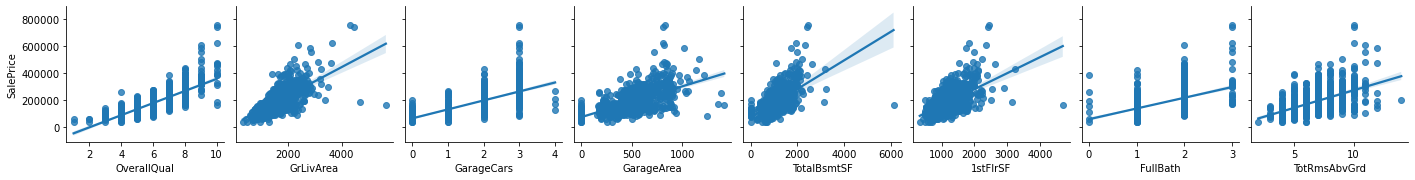

In [212]:
#draw the pair plot for correlated value
sns.pairplot(df,x_vars=corr_coef_cols[1:],y_vars=[corr_coef_cols[0]],kind="reg")

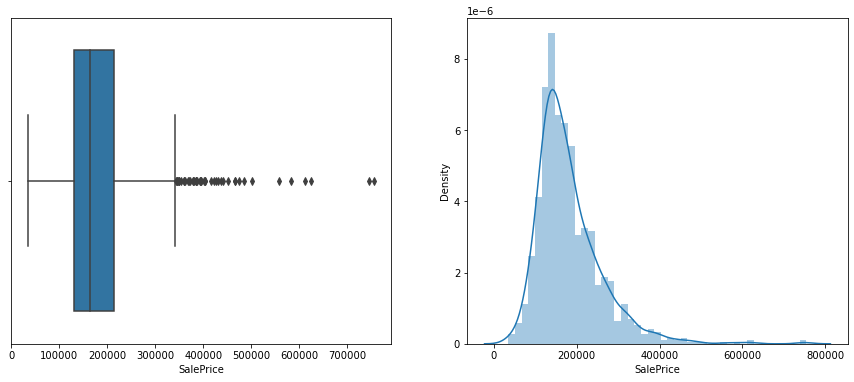

In [213]:
# Let us check the SalePrice as well
f, axes = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(df['SalePrice'],  orient='v' , ax=axes[0])
sns.distplot(df['SalePrice'], ax=axes[1])
plt.show()

Lable encoding

In [232]:
def label_encoding(colNames):
    for colName in colNames:
        unique_vals = df[colName].unique()
        map_vals = {}
        for idx, val in enumerate(unique_vals):
            map_vals[val] = idx
        df[colName] = df[colName].map(map_vals)

In [233]:
cat_col_list = ['LandSlope', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 
                'GarageFinish', 'GarageQual', 'GarageCond', 'ExterCond', 'LotShape']
label_encoding(cat_col_list)

In [234]:
df[cat_col_list].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,1,1,0,1,1,0,0,1,0
2,0,1,0,0,2,1,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,2,0,1,2,0,0,0,0


In [236]:
df

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,4928,0,0,6,5,0.0,0,0,0,0,0,0,120,0,0,958,1078,0,0,958,0,0,958,0,0,2,0,2,1,0,5,1,0,2,440,0,0,0,205,0,0,0,0,0,128000,34,34,3,33.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,15865,0,1,8,6,0.0,1,1,1,1,1,0,351,1,823,1043,2217,1,0,2217,0,0,2217,1,0,2,0,4,1,1,8,1,1,2,621,0,0,81,207,0,0,224,0,0,268000,40,40,3,40.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,9920,0,0,7,5,0.0,1,0,0,0,2,1,862,0,0,255,1117,1,0,1127,886,0,2013,1,0,2,1,3,1,

In [237]:
df.shape

(1168, 193)

Target variable transformation

In [250]:
# Transform SalePrice
df['SalePrice'] = np.log1p(df['SalePrice'])

Modle buildig

In [256]:
# Create train and test data
x_train, x_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [257]:
# Scale data
scaler_col = ['MSSubClass','LotArea','OverallQual','OverallCond', 'MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF',
              'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
              'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
x_train[scaler_col] = scaler.fit_transform(x_train[scaler_col])
x_test[scaler_col] = scaler.transform(x_test[scaler_col])

In [260]:
x_train.fillna(0).head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
227,-0.292410,-0.580759,1,0,-1.508085,0.395781,-0.567394,0,0,1,0,0,3,-0.994911,0,-0.278136,0.637750,-0.442216,1,0,-0.753512,-0.776351,-0.121615,-1.219019,-0.809275,-0.215829,-1.047650,-0.786890,-2.288905,-0.202266,0,-1.603787,-0.962658,3,-2.372932,-2.237248,2,3,-0.780074,-0.710483,-0.349413,-0.12634,-0.263200,-0.077801,-0.080242,-1.238454,54,54,3,0.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
247,2.430425,-0.929805,1,0,0.608935,-0.515073,-0.567394,1,0,0,0,0,3,-0.994911,0,-0.278136,0.033907,-1.099249,1,0,-1.679883,0.633001,1.504893,-0.573160,-0.809275,-0.215829,0.750523,1.197336,-1.069847,-0.202266,1,-1.603787,-0.962658,0,0.286444,-0.001197,0,0,-0.780074,1.806157,-0.349413,-0.1263

In [262]:
x_train.isnull().sum()

MSSubClass               0
LotArea                  0
LotShape                 0
LandSlope                0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 193, dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

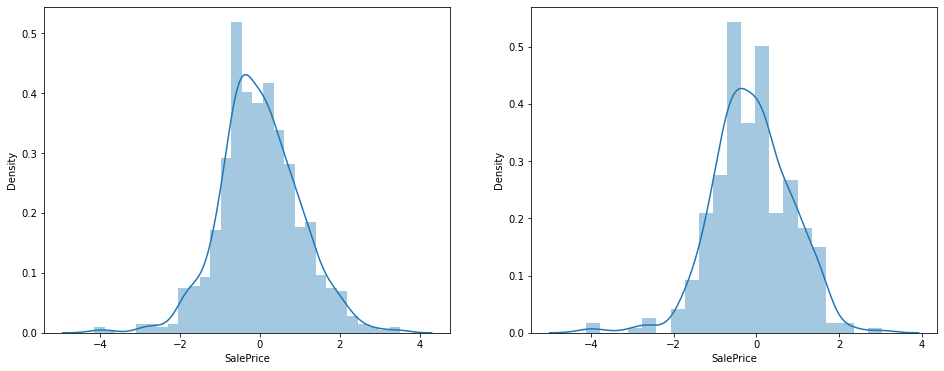

In [263]:
# Let us check if the target variable is normal in both train and test dataset
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(x_train.SalePrice)
plt.subplot(122)
sns.distplot(x_test.SalePrice)

In [284]:
# Create X and y
y_train = x_train.pop('SalePrice')
X_train = x_train

y_test = x_test.pop('SalePrice')
X_test = x_test

KeyError: 'SalePrice'

In [285]:
np.all(np.isfinite(x_train))

True

In [286]:
np.any(np.isnan(x_train))

False

In [287]:
x_train=x_train.dropna()
x_train

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
247,2.430425,-0.929805,1,0,0.608935,-0.515073,-0.567394,1,0,0,0,0,3,-0.994911,0,-0.278136,0.033907,-1.099249,1,0,-1.679883,0.633001,1.504893,-0.573160,-0.809275,-0.215829,0.750523,1.197336,-1.069847,-0.202266,1,-1.603787,-0.962658,0,0.286444,-0.001197,0,0,-0.780074,1.806157,-0.349413,-0.126340,-0.263200,-0.077801,-0.080242,5,5,4,5.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1097,0.062742,-0.192156,0,0,-0.096739,-0.515073,-0.567394,1,0,0,0,0,4,0.131632,0,-0.278136,-0.477861,-0.484155,1,0,-0.799575,1.178192,-0.121615,0.383316,-0.809275,-0.215829,0.750523,1.197336,0.149212,-0.202266,1,0.289701,-0.962658,0,0.286444,0.897881,0,0,0.966807,0.138504,-0.349413,-0.126340,-0.263200,-0.077801,-0.0802

In [288]:
#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').